In [1]:
import numpy as np
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [8]:
y_train = (y_train == 5)

In [9]:
import matplotlib.pyplot as plt

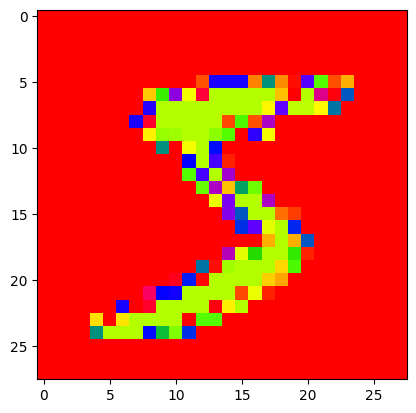

In [10]:
plt.imshow(x_train[0],cmap='prism')

In [11]:
x_train = x_train/255.0

In [12]:
x_test=x_test/255.0

In [43]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(units=512,activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 402,433 (1.54 MB)

 Trainable params: 402,433 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.compile( optimizer='rmsprop', loss= 'binary_crossentropy',metrics = ['accuracy'])

In [45]:
h = model.fit(x_train,y_train,epochs=10,batch_size=256)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9527 - loss: 0.1366
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9913 - loss: 0.0282
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9933 - loss: 0.0191
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9950 - loss: 0.0146
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9965 - loss: 0.0109
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9978 - loss: 0.0078
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9985 - loss: 0.0055
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9984 - loss: 0.0052
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9991 - loss: 0.0035
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9995 - loss: 0.0026


In [47]:
model.predict(np.expand_dims(x_train[0], axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([[0.99997884]], dtype=float32)

In [48]:
y_test = ( y_test==5)

In [49]:
eval_loss, eval_acc =model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9065 - loss: 1.0501


In [50]:
eval_loss

1.066530466079712

In [51]:
eval_acc

0.9089999794960022

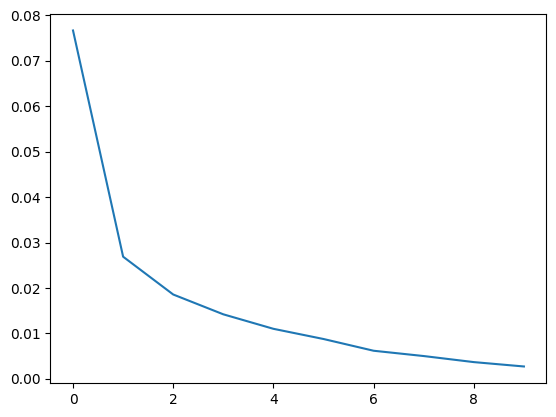

In [52]:
plt.plot(h.history['loss'])

In [53]:
img = x_train[0]

In [54]:
img.shape

(28, 28)

In [55]:
img = img.reshape(1, 28, 28)

In [56]:
img.shape

(1, 28, 28)

In [57]:
model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


array([[0.99997884]], dtype=float32)

In [58]:
y_train_pred = model.predict(x_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


In [61]:
y_train_pred = ( y_train_pred>.5)

In [62]:
from sklearn.metrics import confusion_matrix

In [63]:
confusion_matrix(y_train, y_train_pred)

array([[54525,    54],
       [    0,  5421]])

In [38]:
np.where(y_train==5)

(array([], dtype=int64),)

In [39]:
y_train

array([ True, False, False, ...,  True, False, False])